This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environement

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import RawToUDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Datasets

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
dataset = RawToUDDataset(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)

Number of sentences 360


In [5]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [6]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 46


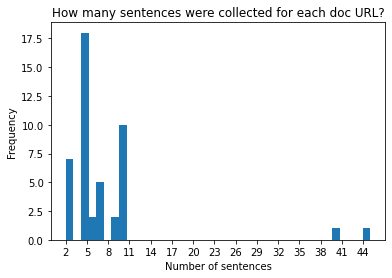

In [8]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [9]:
doc_word_freqs = analyzer.get_doc_word_freq(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
{k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:30]}

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.11868978733129844,
 'là': 0.14424389180368663,
 'của': 0.1576078533616681,
 'các': 0.1713961378473014,
 'cho': 0.18563657696191166,
 'được': 0.200359833782618,
 'đã': 0.21559980033935483,
 'với': 0.21559980033935483,
 'trong': 0.21559980033935483,
 'có': 0.23139406752258676,
 'người': 0.2477844837107561,
 'từ': 0.2477844837107561,
 'này': 0.28254658996996806,
 'theo': 0.28254658996996806,
 'không': 0.3010299956639812,
 'đó': 0.3203351508593678,
 'để': 0.3203351508593678,
 'nhiều': 0.34053853694765485,
 'ở': 0.34053853694765485,
 'vào': 0.34053853694765485,
 'năm': 0.34053853694765485,
 '(': 0.34053853694765485,
 ')': 0.34053853694765485,
 'đến': 0.36172783601759284,
 'những': 0.3840042307287451,
 'một': 0.3840042307287451,
 'cũng': 0.3840042307287451,
 'ngày': 0.40748532657826797}

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [10]:
counter = analyzer.analyze_words(dataset)

Most common words
[(',', 455), ('.', 333), ('và', 105), ('của', 91), ('người', 71), ('các', 71), ('được', 71), ('trong', 71), ('cho', 71), ('là', 69), ('không', 69), ('có', 66), ('với', 60), ('để', 55), ('đã', 53), ('đến', 53), ('những', 49), ('này', 49), ('điểm', 48), ('ngày', 47), ('từ', 47), ('"', 45), ('một', 42), ('khi', 40), ('nhiều', 38), ('cũng', 38), ('ở', 37), ('vào', 35), ('năm', 35), ('phải', 34), ('theo', 34), ('(', 34), (')', 34), ('mình', 34), ('tôi', 34), ('đó', 33), ('như', 33), ('2', 32), ('anh', 31), ('sau', 28), ('đi', 27), ('thi', 26), ('tại', 26), ('cả', 26), ('nhưng', 24), ('mới', 24), ('nhất', 24), ('chỉ', 23), ('ra', 23), ('về', 23)]
Corpus words:  2093
OOV words
{'cho phép', 'đê la thành', 'mỳ', 'real madrid', 'đóa', 'kon tum', 'bộ khoa học và công nghệ', 'tp.hcm', 'vi phạm luật', '273', 'ôtô', 'ca', 'chăng dây', 'thái sơn', '2001', 'qr code', 'trần vĩnh tuyến', 'lê hay', 'nhin', 'hiện thực hóa', '12/8', '300.000', 'ncov', 'tùy', '1.750', 'omachi', 'điện thông

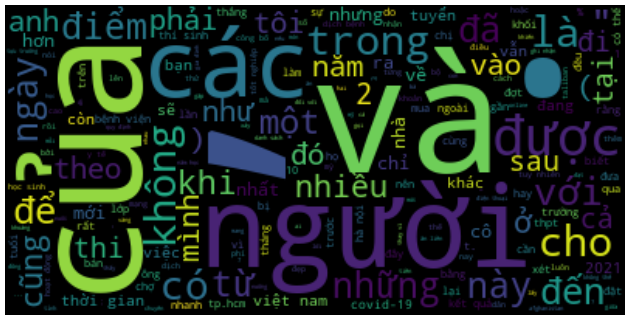

In [11]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [12]:
counter = analyzer.analyze_today_words(dataset)

Most common words
[(',', 84), ('.', 62), ('và', 29), ('của', 29), ('các', 22), ('với', 18), ('để', 17), ('trong', 15), ('người', 15), ('cho', 14), ('đã', 13), ('việt nam', 13), ('từ', 13), ('đến', 13), ('có', 12), ('làm', 12), ('hơn', 12), ('này', 12), ('những', 12), ('là', 11), ('mỳ', 10), ('năm', 10), ('"', 10), ('được', 9), ('về', 9), ('ăn liền', 8), ('phải', 8), ('ông', 7), ('theo', 7), ('không', 7), ('khi', 7), ('sẽ', 7), ('nhiều', 7), ('tác giả', 7), ('tại', 6), ('ở', 6), ('vi phạm', 6), ('còn', 6), ('đó', 6), ('rằng', 6), ('nhưng', 6), ('sự', 6), ('như', 6), ('đầu tư', 5), ('mỹ', 5), ('cũng', 5), ('nhất', 5), ('đang', 5), ('mới', 5), ('một', 5)]
Corpus words:  693
OOV words
{'”', 'sức khỏe', 'mỳ', '...', 'bộ khoa học và công nghệ', 'đe dọa', 'vi phạm luật', '2021', 'thái lan', '2016', 'vinacapital', 'unodc', '.', 'trần vĩnh tuyến', 'kéo dài', 'lê hay', 'nhin', 'hiện thực hóa', '9', 'seo', 'ncov', '8', '7', 'omachi', 'covid-19', '?', '2,5', '2', 'wina', ')', '“', 'park hang', 'nh

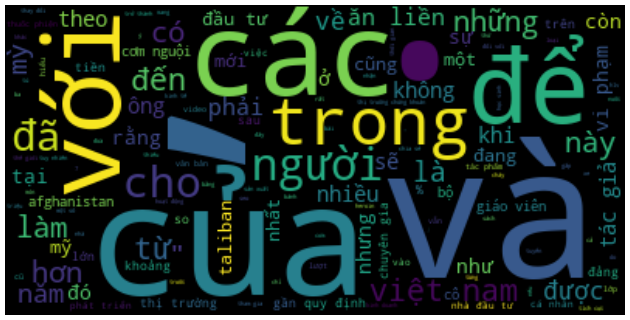

In [13]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)